In [1]:
import PySaRLAC as sl
import random
import math
import numpy as np
random.seed(1234)

In [2]:
N=400
raw = sl.RawDataDistribution(N)

for i in range(N):
    raw[i] = random.gauss(0.0,1.0)
    

In [3]:
Lt = 32
raw = sl.CorrelationFunction(Lt)
for t in range(Lt):
    raw.setCoord(t, float(t))
    raw.setValue(t, sl.RawDataDistribution(N))
    raw.value(t).randomGaussian(0.,1.)

    
    

In [16]:
nboot=500

In [4]:
rtable = sl.BootstrapResampleTable(nboot, N)

In [5]:
boot = raw.resample(sl.BootstrapDistribution,rtable)

In [6]:
bjack = raw.resample(sl.BootJackknifeDistribution, rtable)

In [10]:
fit_start = 4
fit_end = 16
bjack_inrange = bjack.sliceRange(fit_start,fit_end)
boot_inrange = boot.sliceRange(fit_start,fit_end)

In [11]:
fitfunc = sl.FitConstant()

In [12]:
fitter = sl.Fitter(fitfunc)

In [13]:
fitter.generateCovarianceMatrix(bjack_inrange)

In [17]:
params = [sl.BootstrapDistribution(nboot,0.5)]

In [18]:
chisq, dof = fitter.fit(params, boot_inrange )

Performing a fit with 1 free parameters and 12 degrees of freedom


In [19]:
chisq.mean()/dof

np.float64(2.0058539260710306)

In [21]:
fit_y = sl.evaluateFitFunc(fitfunc,boot_inrange,params)

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot

In [25]:
plot_data = boot.plotInputs()
plot_result = fit_y.plotInputs()

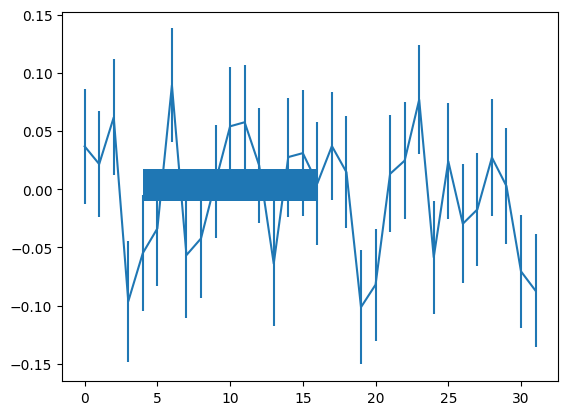

In [26]:
pyplot.errorbar(plot_data[0],plot_data[1],yerr=plot_data[2])
pyplot.fill_between(plot_result[0],plot_result[1]-plot_result[2],plot_result[1]+plot_result[2])